# Capstone Project: Full Report: Car Accident Severity 

In [3]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O car_acc_severity.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-01 19:19:53--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘car_acc_severity.csv’

car_acc_severity.cs 100%[===================>]  70.49M   168KB/s    in 7m 27s  

2020-09-01 19:27:22 (161 KB/s) - ‘car_acc_severity.csv’ saved [73917638/73917638]



### A. Introduction

#### A.1. Description & Discussion of the Background

Road Accident is the most undesirable and unexpected thing to occur to a road user, though they happen quite often. Unfortunately, we can see a minatory rise of road accidents in United Kingdom, conspicuously highroad accidents over the past few years. It has a massive impact on society as well as in the economy of our country as there is an immense cost of fatalities and injuries. According to a recent report, annually on an average 9,000 lives have been taken by road accidents and lead to almost 28,000 injuries. This record indicates that every day, approximately 28 people were killed by road accidents and it is quite devastating. Besides this, according to WHO, the economic cost of road accidents to a developing country like us is 2-3% of GDP, which is a significant loss for a country like ours. Moreover, reducing this loss has become a great matter of concern for our country now.

#### A.2. Data Description

For the accurate prediction of the severity of accidents, a considerable number of traffic accident records with full information is required to train by using the proposed approaches. In this research work, the authors have collected a dataset from the Traffic Bureau that consists of total 37,885 traffic accidents record from the year 2007-2017. The entire dataset will split into two parts- Training Dataset and Test Dataset. 70% of the whole dataset has been chosen randomly by using a python library as a training data set and the remaining 30% has been used as our test dataset. We have used the 70-30 ratio for splitting dataset because of its proven accuracy.


In [3]:
df = pd.read_csv('car_acc_severity.csv')
df.head()

/home/shubham/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Visualization

In [4]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['DAYOFWEEK'] = df['INCDTTM'].dt.dayofweek
df['TIMEOFDAY'] = df['INCDTTM'].dt.hour
# define time of day: Night, Morning, Afternoon and Evening 
df['TIMEOFDAY'] = df['TIMEOFDAY'].apply(lambda x: 'NIGHT' if (x<6) else ('MORNING' if (x<12) else ('AFTERNOON' if (x<18) else 'EVENING')))

In [6]:
df.groupby(['TIMEOFDAY'])['SEVERITYCODE'].value_counts(normalize=False)

TIMEOFDAY  SEVERITYCODE
AFTERNOON  1               46109
           2               21692
EVENING    1               27265
           2               11620
MORNING    1               29225
           2               12813
NIGHT      1               33886
           2               12063
Name: SEVERITYCODE, dtype: int64

In [7]:
df.groupby(['TIMEOFDAY'])['SEVERITYCODE'].value_counts(normalize=True)

TIMEOFDAY  SEVERITYCODE
AFTERNOON  1               0.680064
           2               0.319936
EVENING    1               0.701170
           2               0.298830
MORNING    1               0.695204
           2               0.304796
NIGHT      1               0.737470
           2               0.262530
Name: SEVERITYCODE, dtype: float64

In [8]:
df['ROADCOND'].isnull().value_counts()
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

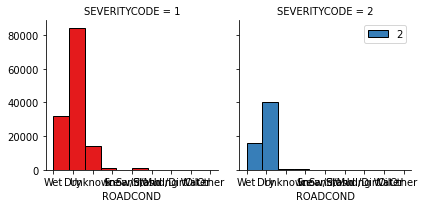

In [13]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND', ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

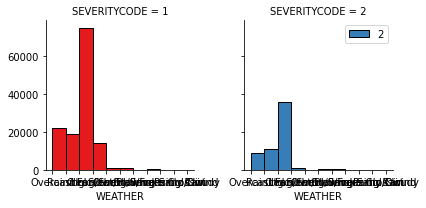

In [15]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'WEATHER', ec="k")
g.axes[-1].legend()
plt.show()

In [16]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [17]:
df['SPEEDING'] = df['SPEEDING'].apply(lambda x: 1 if (x=='Y') else 0)

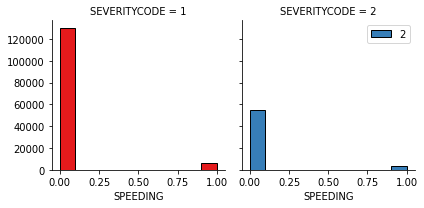

In [18]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SPEEDING', ec="k")
g.axes[-1].legend()
plt.show()

In [19]:
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         1               0.705099
          2               0.294901
1         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

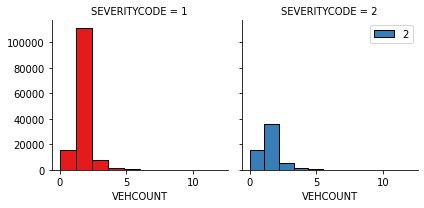

In [21]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', ec="k")
g.axes[-1].legend()
plt.show()

In [22]:
df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         1               0.758702
          2               0.241298
1         2               0.547810
          1               0.452190
2         1               0.756526
          2               0.243474
3         1               0.579554
          2               0.420446
4         1               0.555647
          2               0.444353
5         1               0.506616
          2               0.493384
6         1               0.589041
          2               0.410959
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64

### B. Methodology

My master data which has the main components Severity Code, Weather Elements, Light Condition, Junction Type and Collission Type. For classification problems, matplotlib is extensively used the supervised algorithm. The primary perspective of this algorithm is predicting the value of the desired variable by learning decision rules deduced from the features of the data and create a model of that. A root node is designated for the construction of this model based on the best attribute picked by the gain approach and the sub-nodes are then generated on the basis of the decision taken in relation to the status of quality selected at each node. When each node is reduced to a single quality status, the class is determined at the end of the node; it is called a leaf. These courses of action continue recursively until a class is defined at the end of each node.

### C. Results

In this research paper, I have determined the performance of each algorithm, for four accident severity classes (Fatal / Grievous /Simple Injury/ Motor Collision). By overall performance, Ada-Boost gives the best result because of its iterative classification on matplotlib.

### D. Discussion

We observe that most of the accidents in our dataset are Fatal and value for the other three classes is very low. For that reason, in second experiment, we merge Grievous, Simple Injury, Motor Collision these three accident severity classes into one class. Therefore, we have attained the performances of the proposed approaches for two accident severity classes (Fatal / Grievous). In this experiment, we have noticed that the accuracy of interpolated data get increased and remain the same. But it is also mentionable that, the performance is much better than the previous experiment as precision and F1 score increased here in a noticeable way. Besides this, we did experiment with the features in our dataset and have tried to find out their effect on a traffic accident. Statistically I have found that based on the condition of some features the number of accidents gets increased. It’s a significant noticeable thing for making proper steps to decrease the number of accidents.

### F. Conclusion

 As a result, people are turning to big cities to start a business or work. From the above table, we can see that servere car accidents occurs frequently under clear and dry condition at intersection. Besides, speeding is also an important factor leading the accident happen.
